도미의 feature인 길이와 무게를 변수로 설정

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0] #도미 길이
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0] #도미 무게

두 특성을 그래프로 표현한다.

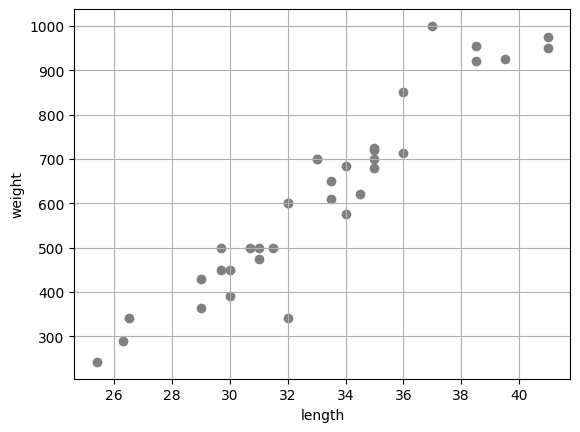

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight, color='gray')
plt.xlabel('length')
plt.ylabel('weight')
plt.grid()
plt.show()

빙어의 feature인 길이와 부게를 변수로 설정

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

두 특성을 그래프로 표현한다.

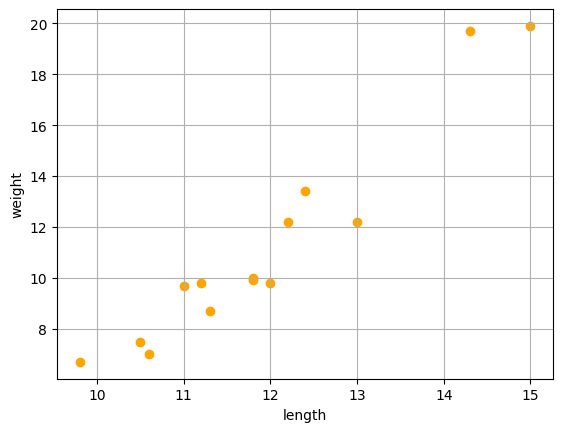

In [4]:
import matplotlib.pyplot as plt

plt.scatter(smelt_length, smelt_weight, color='orange')
plt.xlabel('length')
plt.ylabel('weight')
plt.grid()
plt.show()

도미 데이터와 빙어 데이터를 병합하여 산점도를 나타낸다.

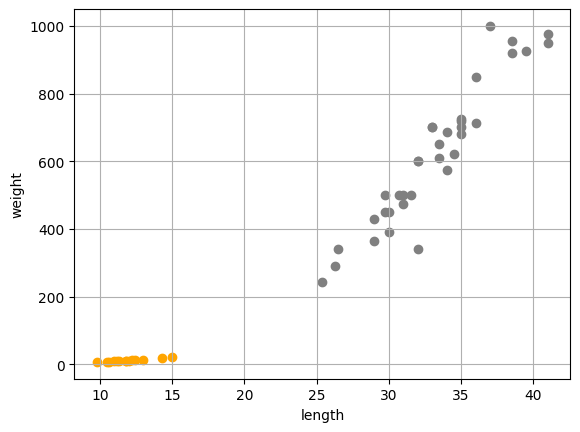

In [5]:
plt.scatter(bream_length, bream_weight, color='gray')
plt.scatter(smelt_length, smelt_weight, color='orange')
plt.xlabel('length')
plt.ylabel('weight')
plt.grid()
plt.show()

### k-최근접 이웃 알고리즘을 사용한 도미와 빙어 데이터 분류

빙어와 도미의 길이와 무게 데이터를 병합하여 하나의 길이 리스트와 무게 리스트를 생성한다.

In [6]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

생선 한 마리당 길이와 무게를 보기 위해 zip을 이용해 한 생선에 대한 (길이, 무게) 데이터들을 저장

또한 사이킷런이 원하는 데이터의 형태는 2차원 리스트 형태이기 때문에 그에 따라 데이터 구조 변환 필요

In [7]:
test = zip(length, weight)

fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

이번 프로젝트는 지도학습이기 때문에 각 생선이 도미인지 빙어인지 알고 있다.

따라서 찾고자하는 도미를 1, 빙어를 0으로 설정하여 **타겟(레이블) 데이터**를 생성한다.

In [8]:
fish_target = [1]*35 + [0]*14   # 도미가 35마리, 빙어가 14마리
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


사이킷런의 K-최근접이웃 클래스

In [9]:
!pip install scikit-learn

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# KNeighborsClass의 객체 생성
kn = KNeighborsClassifier()

In [12]:
# fish 데이터와 fish가 어떤 종류의 fish인지 정답을 알려주는 데이터를 kn class에 저장한다.
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [13]:
# 정답을 알려주는 데이터가 원본 데이터로부터 얼마나 정확한지 정확도를 알려주는 모델 평가를 수행한다.
kn.score(fish_data, fish_target)

1.0

In [14]:
# 도미와 빙어의 길이와 무게를 동시에 비교하여 그래프로 나타내기

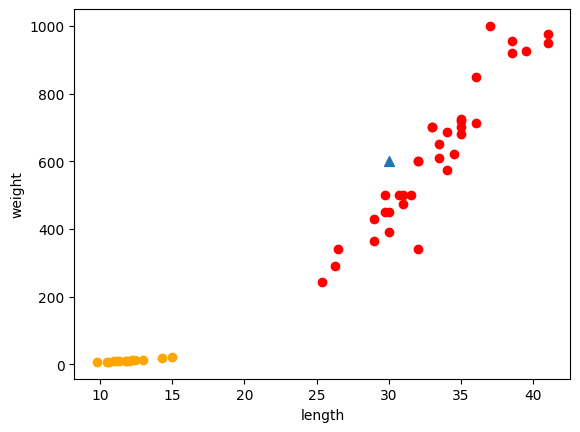

In [15]:
plt.scatter(bream_length, bream_weight, color='red')
plt.scatter(smelt_length, smelt_weight, color='orange')
plt.scatter(30, 600, marker='^', s=50)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
# 새로운 데이터를 대입했을 때 도미인지 빙어인지 분류해내기 위해 predict() 함수를 사용한다.
kn.predict([[30, 600], [50, 550], [5, 20]])

array([1, 1, 0])

In [18]:
# kn 모델은 학습에 사용한 test data(fish_data)와 학습에 사용한 결정값(fish_target)을 가지고 있다.
# 이를 확인해보자
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


### 하지만 위와 같이 정답 데이터를 만들어 놓는 방식은 정답을 미리 알려주고 시험보는 것과 같다.

In [20]:
# 49개의 도미와 빙어가 합쳐진 fish의 길이와 무게 데이터를 만들자.
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 
               9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
               12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0, 
               6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [21]:
# 훈련데이터(학습데이터)
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트데이터(평가데이터)
test_input = fish_data[35:]
test_target = fish_target[35:]

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [24]:
kn.fit(train_input, train_target)  # 학습
kn.score(test_input, test_target)   # 평가

0.0

성능이 0인 이유는 **편향된 데이터 셋 구성** 때문이다.
훈련 세트를 모두 도미 데이터로 잡고 평가 데이터를 모두 빙어 데이터로 잡았기 때문에 빙어 데이터는 학습 과정에서 학습되지 않았다.

In [25]:
import numpy as np

In [26]:
# numpy 배열 사용
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [27]:
print(input_arr.shape)

(49, 2)


### 데이터 섞기 (shuffling)

In [28]:
np.random.seed(42)  # seed 값은 random한 값을 고정하기 위해
index = np.arange(49)  # 0~48까지의 일련된 수를 index로
print('shuffle 전:', index)
np.random.shuffle(index) # index 변수의 값을 변경
print('shuffle 후:', index)

shuffle 전: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
shuffle 후: [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [31]:
# 데이터 분할 (학습 데이터 35개가 shuffle을 통해 도미와 빙어가 골고루 섞인 데이터가 된다.)
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [33]:
input_arr[index[0]]  # 첫번째 index는 13이고 13번째 길이와 무게는 각각 32, 340임

array([ 32., 340.])

In [35]:
# 테스트 데이터 (평가 데이터도 빙어과 도미가 골고루 섞인 데이터가 된다.)
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

Text(0, 0.5, 'weight')

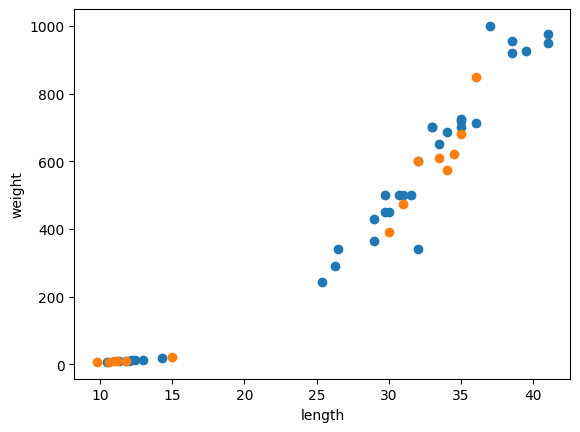

In [37]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])   # shuffle된 fish 전체 데이터에서 길이와 무게
plt.scatter(test_input[:,0], test_input[:,1])    # shuffle된 fish 평가 데이터에서 길이와 무게
plt.xlabel('length')
plt.ylabel('weight')

In [38]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [39]:
kn.score(test_input, test_target)

1.0

In [40]:
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [42]:
kn.predict(test_input)   # 평가 데이터 예측

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 데이터 전처리

In [45]:
fish_data = np.column_stack((fish_length, fish_weight))   # 두 리스트를 column 방향으로 2차원 배열을 만든다.

In [44]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [47]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))   # 두 리스트를 하나의 배열로 row 방향으로 합친다.

In [48]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
# 사이킷런으로 훈련 데이터와 평가 데이터를 나눈다.
from sklearn.model_selection import train_test_split

In [54]:
# 데이터를 무작위로 섞은 뒤 데이터셋을 나눈다. 
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [56]:
# 데이터의 수와 몇 차원인지 알려줌 
print(test_input.shape) 
print(train_target.shape)

(13, 2)
(36,)


In [57]:
import pandas as pd
print(pd.Series(fish_target).value_counts())
print(pd.Series(train_target).value_counts())
print(pd.Series(test_target).value_counts())

1.0    35
0.0    14
dtype: int64
1.0    25
0.0    11
dtype: int64
1.0    10
0.0     3
dtype: int64


In [59]:
train_input, test_input, train_target, test_target = train_test_split(fish_data,
                                                                      fish_target,
                                                                      stratify = fish_target,
                                                                      random_state=42)

#### 성능과 평가 및 테스트

In [62]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)   # 적용할 데이터 셋
kn.score(train_input, train_target)    # 성능 평가

1.0

In [63]:
# 새로운 데이터가 도미인지 빙어인지 예측할 때
kn.predict([[25, 150]])

array([0.])

In [64]:
import matplotlib.pyplot as plt

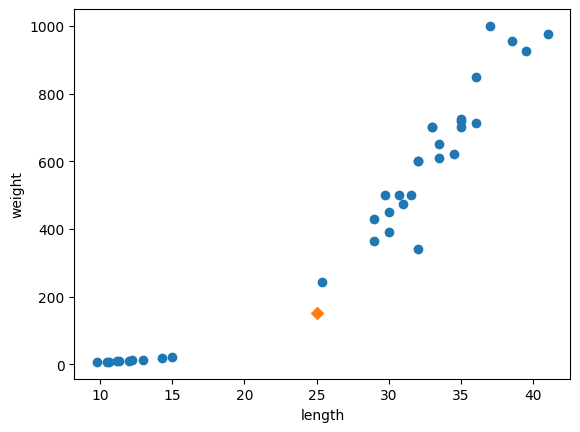

In [65]:
# 길이와 기준을 x축 y축으로 잡고 모든 데이터를 scatter plot으로 나타냄
# 예측하고자하는 데이터는 marker로 표시함.
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [66]:
# 테스트할 도미데이터와 이웃하는 데이터들 탐색!
dist, idx = kn.kneighbors([[25, 150]], n_neighbors=5)

In [68]:
print(dist)
print(idx)
print(train_input[idx])

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]
[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


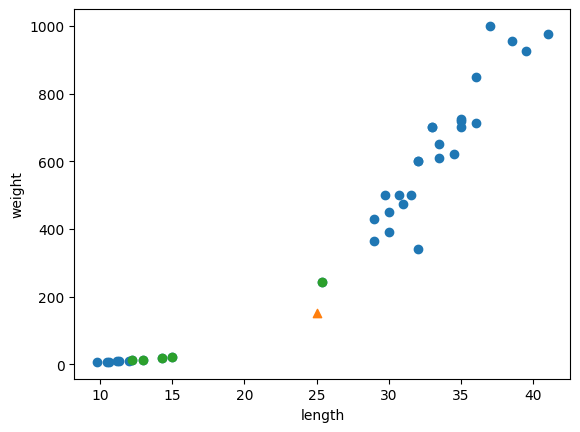

In [69]:
# 이웃들을 plot에서 따로 표시해줌
plt.scatter(train_input[:,0], train_input[:,1]) # 모든 행의 0번째, 1번째 column
plt.scatter(25,150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

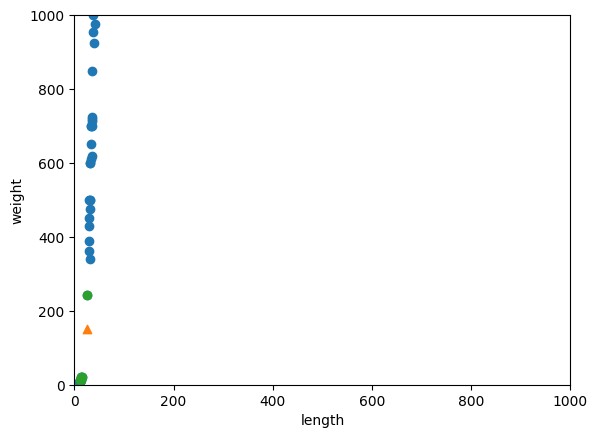

In [70]:
# 기준 맞추기
plt.scatter(train_input[:,0], train_input[:,1]) # 모든 행의 0번째, 1번째 column
plt.scatter(25,150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx, 1])
plt.xlim((0, 1000))
plt.ylim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [73]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
mean, std

(array([ 27.29722222, 454.09722222]), array([  9.98244253, 323.29893931]))

In [75]:
# 평균을 0, 분산을 1로
train_scaled = (train_input-mean)/std
train_scaled[:10]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721]])

### 전처리 데이터로 모델 훈련하기!

Text(0, 0.5, 'weight_sclae')

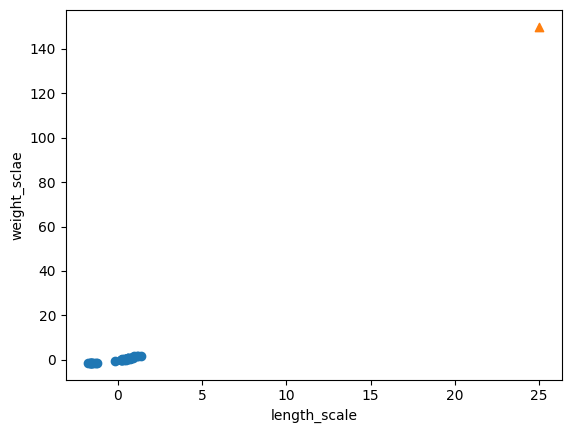

In [76]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length_scale')
plt.ylabel('weight_sclae')

In [77]:
# 테스트 데이터도 스케일링
new =- ([25, 150] - mean)/std
new

array([0.23012627, 0.94060693])

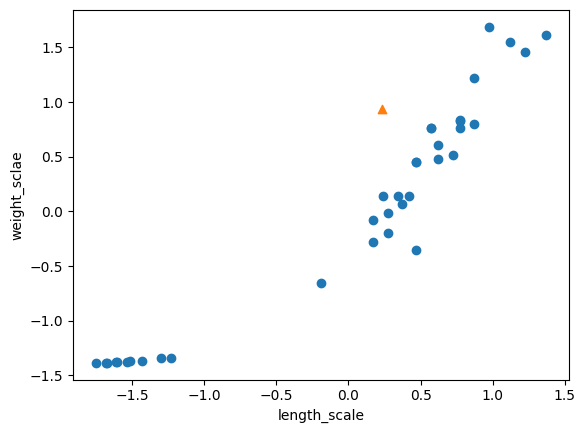

In [78]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length_scale')
plt.ylabel('weight_sclae')
plt.show()

In [79]:
# 학습데이터와 테스트 데이터 모두 스케일링 되었으니 이 데이터로 학습
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [80]:
test_scaled = (test_input - mean)/std
kn.score(test_scaled, test_target)

1.0

In [81]:
kn.predict([new])

array([1.])

In [82]:
dist, idx = kn.kneighbors([new])
print(dist, idx)

[[0.38572934 0.38572934 0.51484598 0.5454339  0.5454339 ]] [[15  2 18 23 28]]


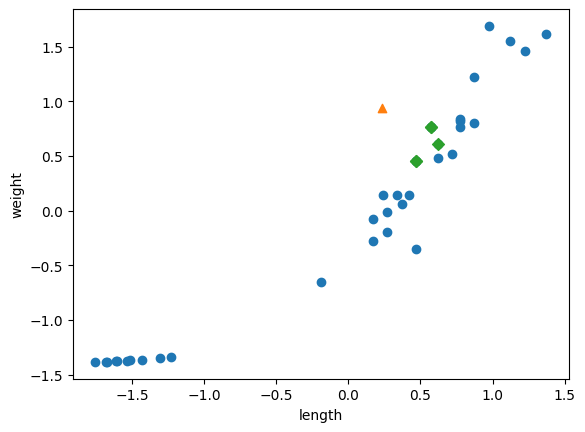

In [83]:
plt.scatter(train_scaled[:,0], train_scaled[:,1]) # 모든 행의 0번째, 1번째 column
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[idx, 0], train_scaled[idx, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()